## Merging Sort


**Divide and Conquer**:
- "Split": Continuously divide the original array into sub-arrays **from the midpoint**, therefore, convert the sorting problem of the origin array into the sorting problem of the sub-arrays.
- "Conquer": When the length of sub-arrays is 1, start to merge 2 shorter **sorted** sub-arrays on the left ad right into a long sorted array, until the original array is completed.    

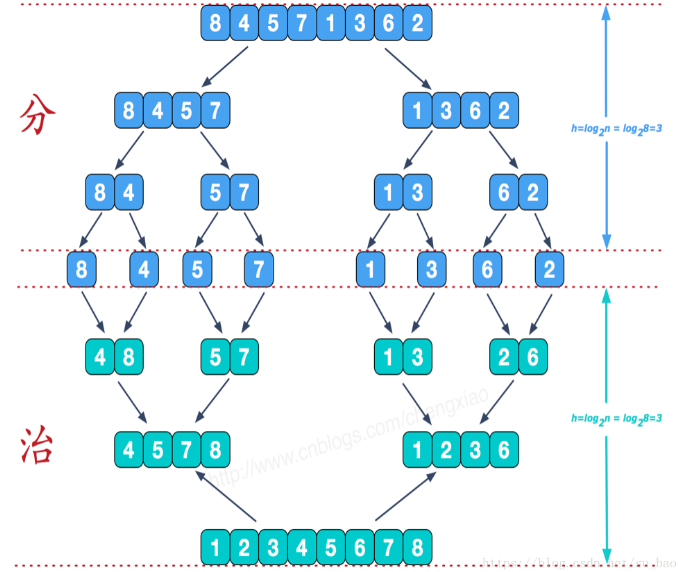

In [72]:
import random
from typing import List
import big_o
import functools

def ignore_unhashable(func): 
    uncached = func.__wrapped__
    attributes = functools.WRAPPER_ASSIGNMENTS + ('cache_info', 'cache_clear')
    @functools.wraps(func, assigned=attributes) 
    def wrapper(*args, **kwargs): 
        try: 
            return func(*args, **kwargs) 
        except TypeError as error: 
            if 'unhashable type' in str(error): 
                return uncached(*args, **kwargs) 
            raise 
    wrapper.__uncached__ = uncached
    return wrapper

In [92]:
class MergeSort:
    def Sort(self, arr: List[int]):
        if len(arr) <= 1: return arr
        mid = len(arr) // 2
        return self.merge(self.Sort(arr[:mid]), self.Sort(arr[mid:]))
        
    def merge(self, left: List[int], right: List[int]):
        res = []
        while len(left) > 0 and len(right) > 0:
            if left[0] > right[0]:
                res.append(right.pop(0))
            else:
                res.append(left.pop(0))
        res += left
        res += right
        return res

In [93]:
arr = lambda n: big_o.datagen.integers(n, 0, 100)
MS = MergeSort()
test_arr = arr(10)
sorted_arr = MS.Sort(test_arr)
print(f"Original Array: {test_arr} \nSorted_arr: {sorted_arr}")

Original Array: [90, 0, 26, 61, 66, 64, 76, 38, 91, 40] 
Sorted_arr: [0, 26, 38, 40, 61, 64, 66, 76, 90, 91]


In [136]:
best, others = big_o.big_o(MS.Sort, arr, min_n=50, max_n=200, n_repeats=100)
print(best)
for class_, residuals in others.items():
    print('{!s:<60s}    (res: {:.2G})'.format(class_, residuals))

Linear: time = 0.00043 + 0.00012*n (sec)
Constant: time = 0.016 (sec)                                    (res: 0.00043)
Linear: time = 0.00043 + 0.00012*n (sec)                        (res: 7.9E-05)
Quadratic: time = 0.0074 + 4.7E-07*n^2 (sec)                    (res: 0.0001)
Cubic: time = 0.0098 + 2.1E-09*n^3 (sec)                        (res: 0.00013)
Polynomial: time = -9 * x^1 (sec)                               (res: 0.32)
Logarithmic: time = -0.049 + 0.014*log(n) (sec)                 (res: 8E-05)
Linearithmic: time = 0.0028 + 2.1E-05*n*log(n) (sec)            (res: 8.1E-05)
Exponential: time = -5.4 * 0.009^n (sec)                        (res: 0.39)


### *Another version of merging sort*

Without using extra arrays, modify the value on the original array

In [78]:
@ignore_unhashable
@functools.lru_cache(maxsize=None)
def mergeSort(arr: List[int], l: int = None, r: int = None):
    l = 0 if l is None else l
    r = len(arr) - 1 if r is None else r
    if l >= r: return
    # Divide the array into 2 sub-arrays
    mid = (l + r) // 2
    mergeSort(arr, l, mid)
    mergeSort(arr, mid + 1, r)
    # Merge the sorted sub-arrays
    tmp = arr[l: r + 1]
    i = 0; j = mid - l + 1
    for k in range(l, r + 1):
        if i == mid - l + 1:
            arr[k] = tmp[j]
            j += 1
        elif j == r - l + 1 or tmp[i] <= tmp[j]:
            arr[k] = tmp[i]
            i += 1
        else:
            arr[k] = tmp[j]
            j += 1
    return arr

In [3]:
def test_space():
    arr = lambda n: big_o.datagen.integers(n, 0, 100)
    test_arr = arr(10)
    sorted_arr = mergeSort(test_arr)
    

### Preformance Test

In [79]:
arr = lambda n: big_o.datagen.integers(n, 0, 100)
test_arr = arr(10)
sorted_arr = mergeSort(test_arr)
print(f"Original Array: {test_arr} \nSorted_arr: {sorted_arr}")

Original Array: [1, 1, 16, 21, 21, 31, 43, 51, 69, 72] 
Sorted_arr: [1, 1, 16, 21, 21, 31, 43, 51, 69, 72]


#### Time Complexity

In [80]:
best, others = big_o.big_o(mergeSort, arr, min_n=50, max_n=200, n_repeats=10)
print(f"Most fitted: {best}")
for class_, residuals in others.items():
    print('{!s:<60s}    (res: {:.2G})'.format(class_, residuals))

Most fitted: Linear: time = -0.00019 + 2.3E-05*n (sec)
Constant: time = 0.0027 (sec)                                   (res: 1.3E-05)
Linear: time = -0.00019 + 2.3E-05*n (sec)                       (res: 7.8E-07)
Quadratic: time = 0.0011 + 8.9E-08*n^2 (sec)                    (res: 1.5E-06)
Cubic: time = 0.0016 + 4E-10*n^3 (sec)                          (res: 2.5E-06)
Polynomial: time = -11 * x^1.1 (sec)                            (res: 0.067)
Logarithmic: time = -0.0093 + 0.0025*log(n) (sec)               (res: 9.4E-07)
Linearithmic: time = 0.00026 + 4E-06*n*log(n) (sec)             (res: 8.5E-07)
Exponential: time = -7.3 * 0.0099^n (sec)                       (res: 0.2)


#### Space Complexity

In [81]:
mergeSort.cache_clear()

In [82]:
from memory_profiler import memory_usage
# returns the memory usage over a time interval.
memory_usage((mergeSort, (arr(10), ) ), interval=.1, timeout=None)

[100.078125, 100.078125, 100.078125]

In [83]:
 %memit mergeSort(arr(10))

peak memory: 100.08 MiB, increment: 0.00 MiB
